In [1]:
import albumentations as A
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from PIL import Image

In [2]:
%env SM_FRAMEWORK=tf.keras
%pip install albumentations>=0.3.0 
%pip install --pre segmentation-models

env: SM_FRAMEWORK=tf.keras
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\User\\Anaconda3\\envs\\Project\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.


In [3]:
import segmentation_models as sm

BACKBONE = 'vgg16'
BATCH_SIZE = 4
CLASSES = ['plant']
#คลาสคืออะไร
LR = 0.0001
EPOCHS = 60

preprocess_input = sm.get_preprocessing(BACKBONE)
# define network parameters
n_classes = 1 if len(CLASSES) == 1 else (len(CLASSES) + 1)  # case for binary and multiclass segmentation
activation = 'sigmoid' if n_classes == 1 else 'softmax'

#create model
model = sm.Unet(BACKBONE, classes=n_classes, activation=activation)

Segmentation Models: using `tf.keras` framework.


In [4]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.savefig('result.png')
    plt.show()

    
# helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

In [5]:
from keras.models import load_model
model.load_weights('model_v1_320.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                                64)                                                           

In [6]:
aug = A.PadIfNeeded(min_height=1088, min_width=1920, p=1)

input : (1080, 1920, 3)
1/1 [==============================] - 6s 6s/step


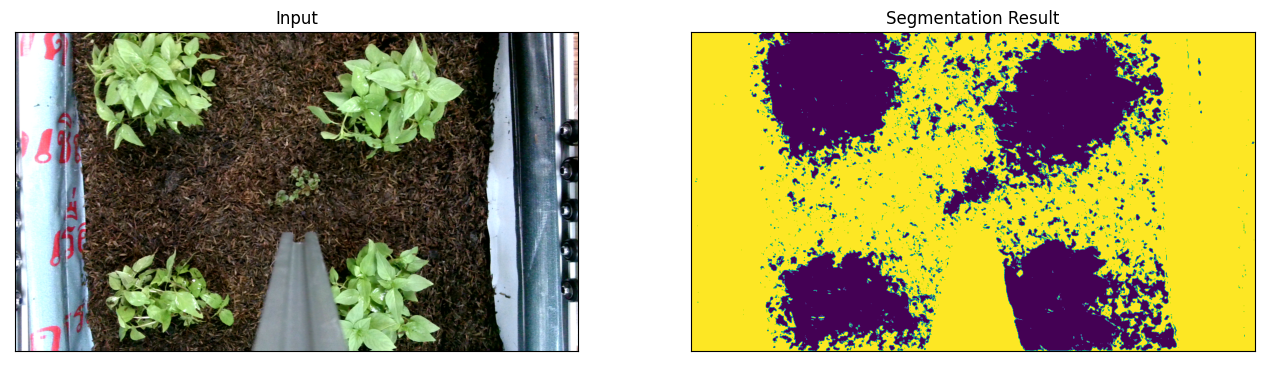

In [7]:
image = cv2.imread('RWSIP-1-1-65-1939.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

augmented = aug(image=image)
image_padded = augmented['image']

print(f'input : {image.shape}')

image_padded = np.expand_dims(image_padded, axis=0)
result = model.predict(image_padded).round()
# extraction = image_padded
extraction = cv2.imread('RWSIP.png')
extraction = cv2.cvtColor(extraction, cv2.COLOR_BGR2RGB)


visualize(
    Input=image_padded.squeeze(),
    Segmentation_result = result[..., 0].squeeze(),
    # Extraction_result = extraction.squeeze(),
    )

# img =  cv2.imread('result.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = Image.fromarray(img.squeeze())

# img.show()

In [8]:
print('-----------SUCCESS----------')
cv2.imwrite('output.png' , cv2.cvtColor( result, cv2.COLOR_BGR2RGB))

-----------SUCCESS----------


True